# Participant Selection for Python in Astronomy 2018

This notebook documents the partipant selection procedure for Python in Astronomy 2018. 
For privacy reasons, this notebook uses data that has been completely randomized within categories, thus no candidate is individually identifiable (and names and other markers of identity have been removed completely).

For this reason, the results of this procedure do not exactly mirror the results of our participant selection: the candidates in our data set here are random combinations that follow the input distributions of our real data, and not actual people. 

With roughly 240 applications for only 60 spots within Python in Astronomy, we felt it was important to be both transparent about and accountable for our selection procedure. This notebook is designed to give the reader an overview of the procedure from start to finish, and we have added our reasoning for certain choices where those were part of the selection. The notebook is also an example of what this kind of procedure can look like, and thus a kind of tutorial for other conference organizers.

Our procedures for admitting participants is constantly evolving as we tweak, make mistakes and learn from them. If you have any suggestions for future procedures (or more generally have thoughts about participant selection), we would love to hear from you either via an issue on this repository, or an e-mail to **python.in.astronomy.soc [at] gmail.com**.

## Overview of selection process

Selection was done in two stages; throughout the process applicants were identified by a numerical ID rather than by name. In the first stage, answers to the free-response questions were reviewed by at least three members of the SOC. The purpose of this stage was to separate the applications based on merit. The second stage was to select, from the pool of well-qualified applicants, the broad range of participants based on responses to the categorical questions on the application. 

The number of categorical questions was large enough that software was used to select participants so as to optimally meet the targets we describe below. Most of those targets were skill-based (e.g. balancing the number with automated testing experience with the number without that experience); targets were also set for some demographic questions.


## Application processing and initial review

We anonymized our applicant pool by replacing names and other identifying information with a unique identifier. The only candidates we rejected outright were either (1) duplicate entries and (2) candidates who had informed us that they would not be able to come. 

For the remainder of the pool, each member of the organizing committee was then asked to make a simple yes/no decision for a candidate based solely on their responses to the questions in the [subsection below](#Questions-used-in-initial-review-by-SOC-members).

We ensured that each response was reviewed by at least three independent members of the committee; SOC members were each assigned a random subset of the applications to review. Reviewers could not see the answers that other members had already given, to further reduce bias.

This allowed us to remove candidates whose objectives for attending the workshop were very far removed from our actual objectives for the workshop. For example, a sizeable number of applicants stated that their goal at the workshop is to learn Python. Because the workshop website and description explicitly said that Python in Astronomy is *not* a Python tutorial, we excluded these candidates from the pool. 

Converting yes/no into numerical scores (1/0), we then accepted candidates whose average score across reviewers was at least 0.5. 


### Questions used in initial review by SOC members

Responses to the questions below were used to do initial screening of applications. 

+ Tell us in 2-3 sentences why you would like to attend this workshop.
+ Tell us in 2-3 sentences what you would contribute to the workshop.
+ What are you interested in getting out of the workshop? (Multi-select)
    - Learn more about python
    - Find collaborators on my project
    - Contribute to other open source projects
    - Make my code available to others
    - Be involved in the open source astronomy community after the conference
+ Would you be interested in giving a contributed talk at the workshop?
+ Would you be willing to give a tutorial on a subject that you are knowledgeable about?
    - If yes, please indicate which topics you would be interested in teaching other participants
+ Interests (Multi-Select from the choices below)
    - Contributing to a project that is distributed to others
    - Releasing your own Python package
    - Using testing frameworks to automate code testing
    - Using Sphinx to write documentation
    - Spectroscopy in Python
+ Have you previously been involved in Python-based educational/teaching activities?
    - If yes, please let us know which ones.
+ Other possible contributions

## Pre-selection

After review, we pre-selected a number of candidates. These included the organizing committee, who need to be present at the meeting, and one candidate whom we had selected blindly based on their abstract for a longer (invited) talk. Finally, we gave each member of the committee to select up to two to three people based on some specific expertise they would bring to the workshop, with a cap of 11 non-SOC, non-talk pre-selects. A total of 19 participants (7 organizers, 11 pre-selects, 1 speaker) where pre-selected. 

## Algorithmic Participant Selection

For the remaining 41 slots, we used `Entrofy` to optimize our participant set based on a set of well-defined criteria which the organizers discussed at length before performing the selection. It's worth noting here that this selection depended entirely on a discussion about the _goals_ of the workshop and was independent of the input data set. 

Before discussing the questions used in this section, we note that it was necessary to recode some resonses.

### Coding

While the questions on the application form collecting data for the second step of the application procedure were all multiple choice-type questions, some of them allowed specification via an "Other" category. Additionally, some categories had a very low response rate. Therefore we re-coded some responses either into a new category or by combining several categories into a new one that was more manageable. For example, we re-coded a response like `PhD Student` into our existing category `Graduate/Postgraduate student` and created a new `other` category for responses such as `Astroparticle Physics`, `science software`, `Solar System`. Finally, we also concatenated the responses in the "Geographical Location" question into 3 categories: `Western Europe`, `North America`, and `Other`.

### Questions 

In the interests of brevity

### Imports

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import entrofy
import pandas as pd

## Data Loading

Pandas to the rescue!

In [70]:
data_ready = pd.read_csv("../data/pyastro18_randomized.csv", index_col="ID", )

Let's have a look at the data:

In [71]:
data_ready.head()

,geo,pos,res,Never used python,python-xp,contrib,release,tests,docs,version,git,branching,gender,race,preselect,reject
ID,,,,,,,,,,,,,,,,
1,North America,early-career,solar and heliospheric physics,No,<=3,No,Yes,No,Yes,Yes,No,Yes,No,NaN,0.0,1.0
2,North America,early-career,galaxies and galaxy clusters,No,5,No,No,Yes,Yes,Yes,Yes,Yes,No,No,0.0,0.0
3,other,faculty,galaxies and galaxy clusters,No,5,Yes,No,No,No,Yes,Yes,Yes,Yes,No,1.0,0.0
4,Western Europe,undergraduate,galaxies and galaxy clusters,No,5,Yes,No,No,Yes,Yes,Yes,Yes,No,No,0.0,1.0
5,other,early-career,galaxies and galaxy clusters,No,5,No,Yes,Yes,No,Yes,Yes,Yes,No,No,0.0,0.0


The software does better when the entries are all strings, so let's convert our table so that all columns contain string values:

In [72]:
data_ready["preselect"] = data_ready["preselect"].astype("str")
data_ready["reject"] = data_ready["reject"].astype("str")

The columns encode the following information:
* `ID`: a numerical ID corresponding to a candidate (in the original data set, this was matched to names and e-mail addresses via a separate table
* `current_position`: Responses to the question about the candidates current (non-)academic position
* `education`: Responses to the question _"Have you previously been involved in Python-based educational/teaching activities?"_
* `gender`: Responses to the question _"In terms of gender identity, do you self-identify as an underrepresented minority in astronomy/astrophysics? "_
* `geography`: Responses to the question _"Geographic Area"_
* `open_source`: Responses to the question _"Have you previously developed or contributed to open-source packages?"_
* `preselect`: pre-selected candidates (see section above for details)
* `previous_unconference`: responses to the question _"Have you attended an unconference before?"_
* `prog_bkg`: Responses to the question _"How would you describe your Python programming background?"_
* `race`: Responses to the question _"In terms of racial or ethnic identity, do you self-identify as an underrepresented minority in astronomy/astrophysics?_
* `reject`: Rejected candidates (because of duplicate entries into the data table or withdrawals)
* `research_area`: Responses to the question _"Research Area"_

### Get pre-select and reject IDs

First, we  will take out the `preselect` and `reject` columns out, since they are not used in entrofy as categories, but rather to pre-select and reject participants. Actually let's just do the rejection at this point:

In [73]:
reject = data_ready["reject"]
reject_idx = reject[reject == 1.0].index
preselect = data_ready["preselect"]
preselect_idx = preselect[preselect == 1.0].index

# this drops all columns with the rejected indices:
data_ready.drop(reject_idx, inplace=True)

Now we can remove the `preselect` and `reject` columns:

In [74]:
data_ready.drop("reject", axis=1, inplace=True)
data_ready.drop("preselect", axis=1, inplace=True)

## Setting Up Entrofy

Okay, now we're ready to set up entrofy for selection. This will invovle tots and lots of dictionaries! 

In [75]:
data_ready.columns

Index(['geo', 'pos', 'res', 'Never used python', 'python-xp', 'contrib',
       'release', 'tests', 'docs', 'version', 'git', 'branching', 'gender',
       'race'],
      dtype='object')

In [76]:
data_ready.rename({'geo': 'geography', 'res': 'research_area', 'pos': 'current_position'}, axis='columns', inplace=True)

There are two important decisions to make for each category (=column): (1) set its weight and (2) set the relative target fractions for each possible answer within a category.

The weight essentially sets the relative importance of the questions we asked compared to each other. The target fractions decide for each category what fraction of participants should ideally have that characteristic. One example would be a split of, say 0.4 for participants with previous unconference experience, and 0.6 for participants without. 

**Note**: Setting target fractions is the single most important part of the selection procedure. It is here that a discussion about the goals of the workshop is of crucial importance, because those goals will necessarily inform the target fractions to be set.

In our case, we set all weights to 1, giving equal weight to all categories:

In [77]:
weights = dict([(c, 1.0) for c in data_ready.columns])

`entrofy` works with a class called `Mappers`. These mappers essentially map target fractions to possible values within categories and contain a lot of information about how the code mades choices. Because all of our columns are categorical variables (with discrete, unordered responses), we can use the `CategoricalMapper` class to construct mappers for all columns:


In [78]:
datatypes = dict([(c, "categorical") for c in data_ready.columns])

In [79]:
datatypes

{'geography': 'categorical',
 'current_position': 'categorical',
 'research_area': 'categorical',
 'Never used python': 'categorical',
 'python-xp': 'categorical',
 'contrib': 'categorical',
 'release': 'categorical',
 'tests': 'categorical',
 'docs': 'categorical',
 'version': 'categorical',
 'git': 'categorical',
 'branching': 'categorical',
 'gender': 'categorical',
 'race': 'categorical'}

In [80]:
mappers = entrofy.core.construct_mappers(data_ready, weights, datatypes=datatypes)

This constructs a dictionary of `CategoricalMapper` objects:

In [81]:
mappers

{'geography': <entrofy.mappers.ObjectMapper at 0x1a2ec70f28>,
 'current_position': <entrofy.mappers.ObjectMapper at 0x1a2ec70c50>,
 'research_area': <entrofy.mappers.ObjectMapper at 0x1a2ec70860>,
 'Never used python': <entrofy.mappers.ObjectMapper at 0x1a2ec7a1d0>,
 'python-xp': <entrofy.mappers.ObjectMapper at 0x1a2ec7a198>,
 'contrib': <entrofy.mappers.ObjectMapper at 0x1a2ec7a278>,
 'release': <entrofy.mappers.ObjectMapper at 0x1a2ec7a4e0>,
 'tests': <entrofy.mappers.ObjectMapper at 0x1a2ec7a550>,
 'docs': <entrofy.mappers.ObjectMapper at 0x1a2ec7a5c0>,
 'version': <entrofy.mappers.ObjectMapper at 0x1a2ec7a630>,
 'git': <entrofy.mappers.ObjectMapper at 0x1a2ec7a6a0>,
 'branching': <entrofy.mappers.ObjectMapper at 0x1a2ec7a710>,
 'gender': <entrofy.mappers.ObjectMapper at 0x1a2ec7a780>,
 'race': <entrofy.mappers.ObjectMapper at 0x1a2ec7a7f0>}

`entrofy` has some plotting capabilities. in particular, it has the ability to make a corner plot to display the relative distributions in the input data set, as well as correlations between different input categories. 

**Note**: We will plot our data here as an example, but it is generally inadvisable to do this *before* having decided on target fractions, because the targets should be a function of the *goals* of the workshop, rather than the input data set.

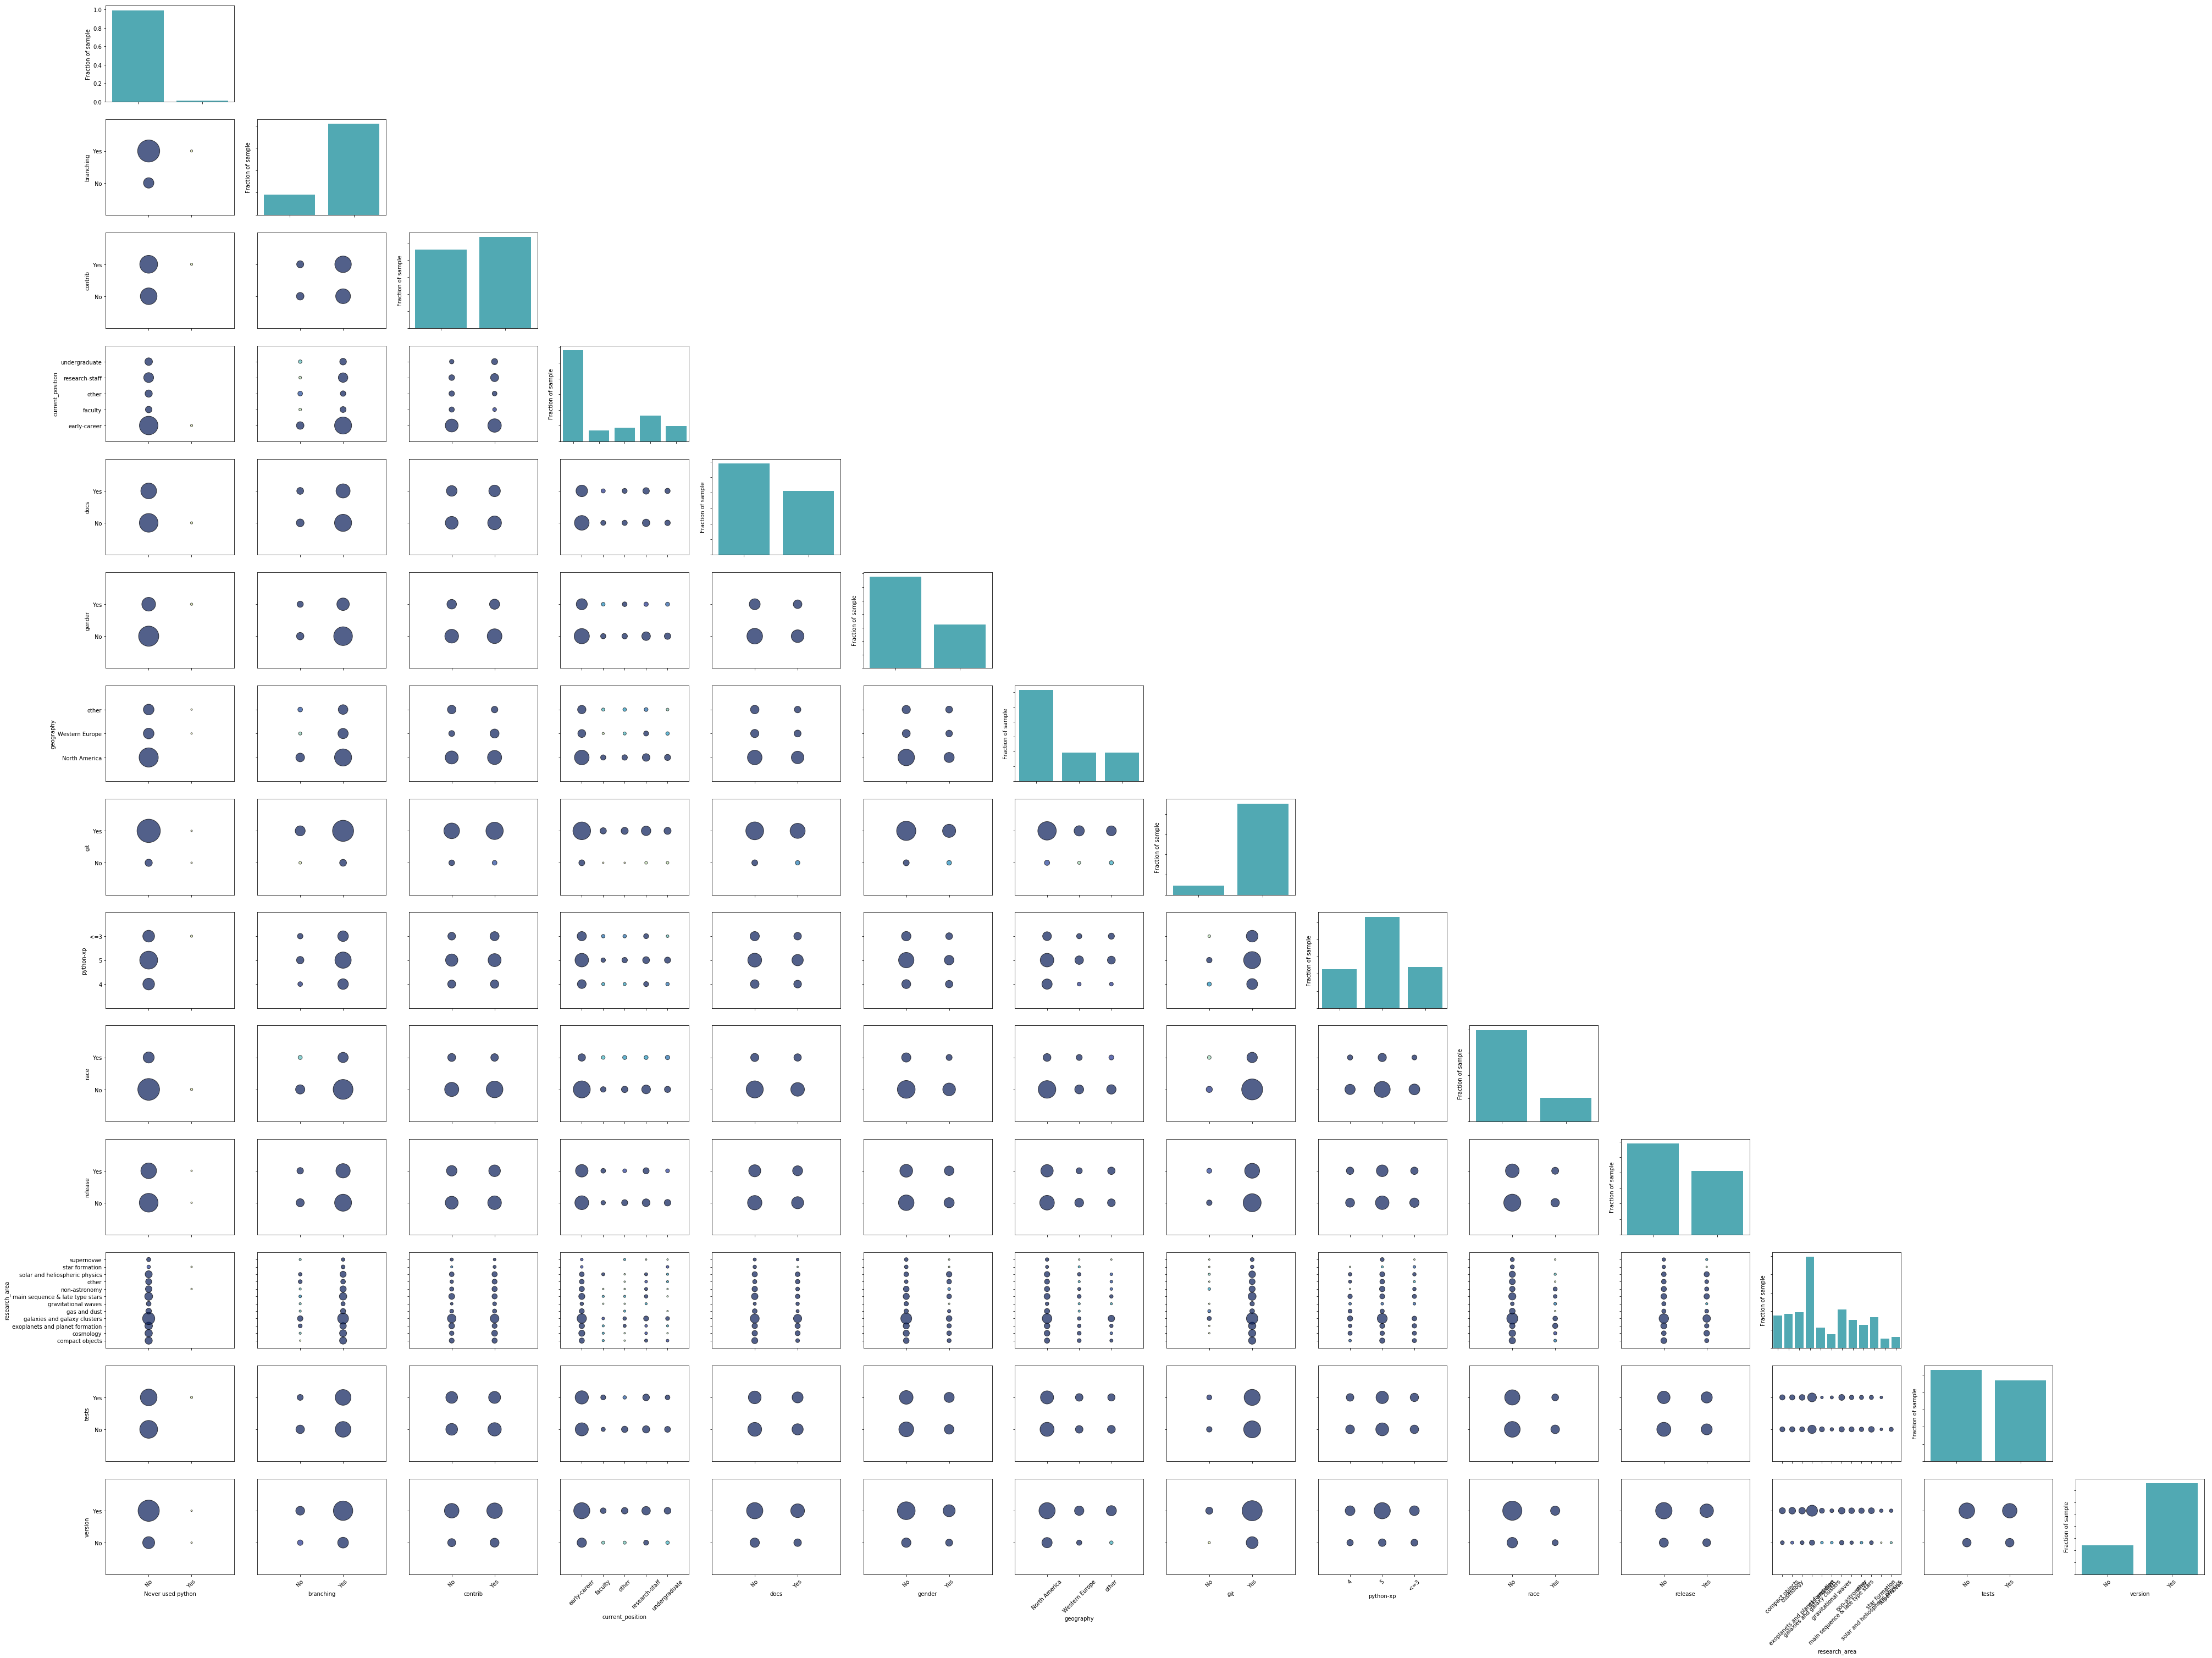

In [82]:
fig, axes = entrofy.plotting.plot_triangle(data_ready, weights, mappers=mappers)

### Targets

Now we can define some targets. Each category (e.g. "talks") has a discrete, finite number of possible outcomes (e.g. "yes" and "no"). The targets define the fraction of participants in the final output set who share the same value (e.g. 30% of participants should be in "yes"). 
The target fractions must sum up to be smaller or equal to 1.0 for each category. If the target fractions sum to a value smaller than one, the algorithm will try to fill up categories to *at least* the given fractions, and will ignore that category for the rest of the optimization procedure. The resulting mix of participants in the final set for this category will thus be a combination of the input fractions and the distribution in the input sample, conditioned on the constraints set by the remaining categories.

Below, we will go through each category one by one and lay out our reasoning for the categories chosen. The justification for our choices is an abbreviated version of a longer discussion the organizing committee had before starting the selection procedure. We should note at this point that there is no "correct" way to choose target fractions; the target fractions must necessarily always be a function of the objectives and goals of the workshop, as defined by the organizers, and may also depend on how the organizers see the role of the workshop in the larger community.

Broadly, the goals we defined for Python in Astronomy 2017 as they pertain to participant selection are the following:
* Provide a venue for established open-source projects in astronomy to exchange ideas, knowledge and collaborate
* Invite new researchers into the open-source community and foster long-term engagement
* Teach each other about new tools and best practices in open-source development
* Have participants act as ambassadors who will spread new knowledge into existing communities
* Increase the participation of underrepresented minorities in open-source activities

#### Current Position

For `current_position`, our aim was to find a mix between young researchers engaged in open-source activities or interested in OSS, and more senior developers and project managers. Traditionally, engagement is highest among graduate students and postdocs, but also among research staff (particularly a strong engagement of STScI in astropy). These three groups account for the large majority of accepted participants. We also aimed to accept teaching faculty, who are likely to act as multipliers for new tools and practices within their groups and communities. Finally, we felt that a small number of undergraduate students could benefit from attendance at the meeting, and we included a category "other" for those participants who don't fit into standard academic categories.

In [83]:
data_ready["current_position"].unique()

array(['early-career', 'faculty', 'undergraduate', 'other',
       'research-staff'], dtype=object)

In [84]:
pos_targets = {"early-career":0.5,
               "research-staff":0.2,
               "other":0.15, 
               "undergraduate":0.05,
               "faculty": 0.1}


In [85]:
mappers["current_position"].targets = pos_targets

It has also been suggested to weigh this category not as highly:

In [86]:
weights["current_position"] = 0.7

In [87]:
weights

{'geography': 1.0,
 'current_position': 0.7,
 'research_area': 1.0,
 'Never used python': 1.0,
 'python-xp': 1.0,
 'contrib': 1.0,
 'release': 1.0,
 'tests': 1.0,
 'docs': 1.0,
 'version': 1.0,
 'git': 1.0,
 'branching': 1.0,
 'gender': 1.0,
 'race': 1.0}

In [88]:
# weights = {"geo":1.0, "pos":0.7, "res":1.0, "python-xp":1.0, 
           "contrib":0.43, "release":0.43, "tests":0.43, "docs":0.43, "version":0.43, "git":0.43, "branching":0.43,
          "gender":1.0, "race":1.0}

IndentationError: unexpected indent (<ipython-input-88-e1fbac605ca4>, line 2)

#### Research Area

Next category: `research_area`. Here, our goal was to have broad representation of research areas in astronomy, so we set a low target, 6%, equivalent to roughly three people, for each of the research areas. This ensures that every subject will have at least 6% representation (3 people); the rest can be randomly selected. 

In [ ]:
fig, ax = plt.subplots(1, 1)
entrofy.plotting.plot_distribution(data_ready, "research_area", ax=ax)
xticks = ax.xaxis.get_ticklabels()
ax.xaxis.set_ticklabels(xticks, rotation=90);

In [ ]:
ra_targets = dict([(k, 0.06) for k in data_ready["research_area"].unique()])

In [ ]:
ra_targets

In [ ]:
mappers["research_area"].targets = ra_targets

#### Geographic Area

Currently, the majority of Python software efforts occur in North America and Western Europe. 
On the other hand, PyAstro presents a unique opportunity to invite previously disconnected communities in other countries to existing efforts, learn about their experiences and foster long-term engagement beyond the Western world. Thus, we aim to admit a third of participants from countries that are traditionally underrepresented at astronomy conferences.

In [ ]:
mappers["geography"].targets

#### Gender Identity

Any social engineering involving gender and ethnicity or race is necessarily subject to scrutiny. 
Our choices here reflect our beliefs about what we would like PyAstro to be, and what we would like it to be within the larger context of the astronomy community:

* We recognize that underrepresented minorities are particularly underrepresented in the more technical areas within astronomy, including software development
* We also recognize studies that show that diverse groups outperform groups lacking diversity among several axes
* Representation is important: we believe that minority participants might feel more comfortable participating if they do not feel singled out based on their race or gender.

Python in Astronomy represents an albeit small opportunity for us to actively encourage the inclusion of minorities and their software efforts, and thus we feel justified to socially engineer our targets beyond what we would expect from the input data set based on the past two workshops. 

We should note, however, that the targets for race had be adjusted post-hoc when it became clear that their representation in the input data set was too small for the algorithm to find a valid solution. Solving this problem likely requires more targeted advertising among the relevant communities in future iterations of the workshop. 


Non-responses don't count either for or against a candidate; this category will effectively be ignored for that candidate.

In [ ]:
mappers["gender"].targets = {"Yes": 0.5, "No":0.5}

#### Ethnicity/Race

In [ ]:
mappers["race"].targets = {"Yes": 0.4, "No": 0.6}

In [89]:
mappers["race"].targets

{'No': 0.5, 'Yes': 0.5}

#### Python Experience

There were a series of questions about Python experience.  The number of  questions to which respondents answered "yes" is their "python-xp". We wanted to skew the distribution towards more experienced developers to ensure sufficient support for less experienced developers.

In [90]:
pythonxp_targets = {"<=3": 0.2,
                    "4": 0.2,
                    "5":0.4}

mappers['python-xp'].targets = pythonxp_targets

#### Other experience questions

New to this year's application were very granular questions about experience  with specific tools like git, and specific experience like contributing to or releasing a python package.

This group of questions was given a combined weight of 3 (almost all other individual questions have weight 1) because we did not want this group to overwhelm all of the other categories.

Different targets were set for each area. Note that a target of `0.0` for "No" means that answering "No" does not affect selection probability. We  areeffectively setting  theminimum fraction of "Yes" that we want in each category. They  fairarely high to ensure that on any one topic there will be several  people  able to help those new to  the skill/tool.

In [91]:
experience_targets = {
    "contrib": {"Yes": 0.6, "No":0.0},
    "release": {"Yes": 0.35, "No":0.0},
    "tests": {"Yes": 0.4, "No":0.0},
    "docs": {"Yes": 0.35, "No":0.0},
    "version": {"Yes": 0.8, "No":0.0},
    "git": {"Yes": 0.8, "No":0.0},
    "branching": {"Yes": 0.7, "No":0.0},
}

for exp, target in experience_targets.items():
    mappers[exp].targets = target
    weights[exp] = 0.43

### Running Entrofy

We are now almost ready to run the code. 

Because some categories have the same responses (e.g. "Yes" and "No"), we need to add prefixes to the mappers so that answers that appear in multiple columns get attributed correctly:

In [92]:
for key in mappers.keys():
    mappers[key].prefix = key + "_"


In [93]:
mappers

{'geography': <entrofy.mappers.ObjectMapper at 0x1a2ec70f28>,
 'current_position': <entrofy.mappers.ObjectMapper at 0x1a2ec70c50>,
 'research_area': <entrofy.mappers.ObjectMapper at 0x1a2ec70860>,
 'Never used python': <entrofy.mappers.ObjectMapper at 0x1a2ec7a1d0>,
 'python-xp': <entrofy.mappers.ObjectMapper at 0x1a2ec7a198>,
 'contrib': <entrofy.mappers.ObjectMapper at 0x1a2ec7a278>,
 'release': <entrofy.mappers.ObjectMapper at 0x1a2ec7a4e0>,
 'tests': <entrofy.mappers.ObjectMapper at 0x1a2ec7a550>,
 'docs': <entrofy.mappers.ObjectMapper at 0x1a2ec7a5c0>,
 'version': <entrofy.mappers.ObjectMapper at 0x1a2ec7a630>,
 'git': <entrofy.mappers.ObjectMapper at 0x1a2ec7a6a0>,
 'branching': <entrofy.mappers.ObjectMapper at 0x1a2ec7a710>,
 'gender': <entrofy.mappers.ObjectMapper at 0x1a2ec7a780>,
 'race': <entrofy.mappers.ObjectMapper at 0x1a2ec7a7f0>}

Now we're actually ready to run entrofy. We will select for 55 participants, using the pre-selected candidates as a starting point for the optimization. They are included in the procedure so that their attributes will explicitly count towards the total fractions in each category. 

In [94]:
idx, max_score = entrofy.core.entrofy(data_ready, 60, 
                                      pre_selects=preselect_idx,
                                      mappers=mappers,
                                      weights=weights, seed=20)

In [95]:
idx

Int64Index([  3,  11,  13,  15,  19,  25,  26,  36,  41,  43,  47,  49,  52,
             54,  58,  76,  77,  80,  81,  87,  88,  93,  94,  99, 102, 103,
            107, 113, 117, 119, 124, 127, 130, 134, 138, 139, 141, 145, 164,
            179, 181, 183, 186, 189, 193, 199, 202, 203, 210, 212, 217, 218,
            219, 220, 223, 225, 229, 230, 232, 237],
           dtype='int64', name='ID')

In [96]:
max_score

107.57904275017707

Let's make a data set with just the output set:

In [97]:
df_out = data_ready.loc[idx]

Here are the distributions of the output set:

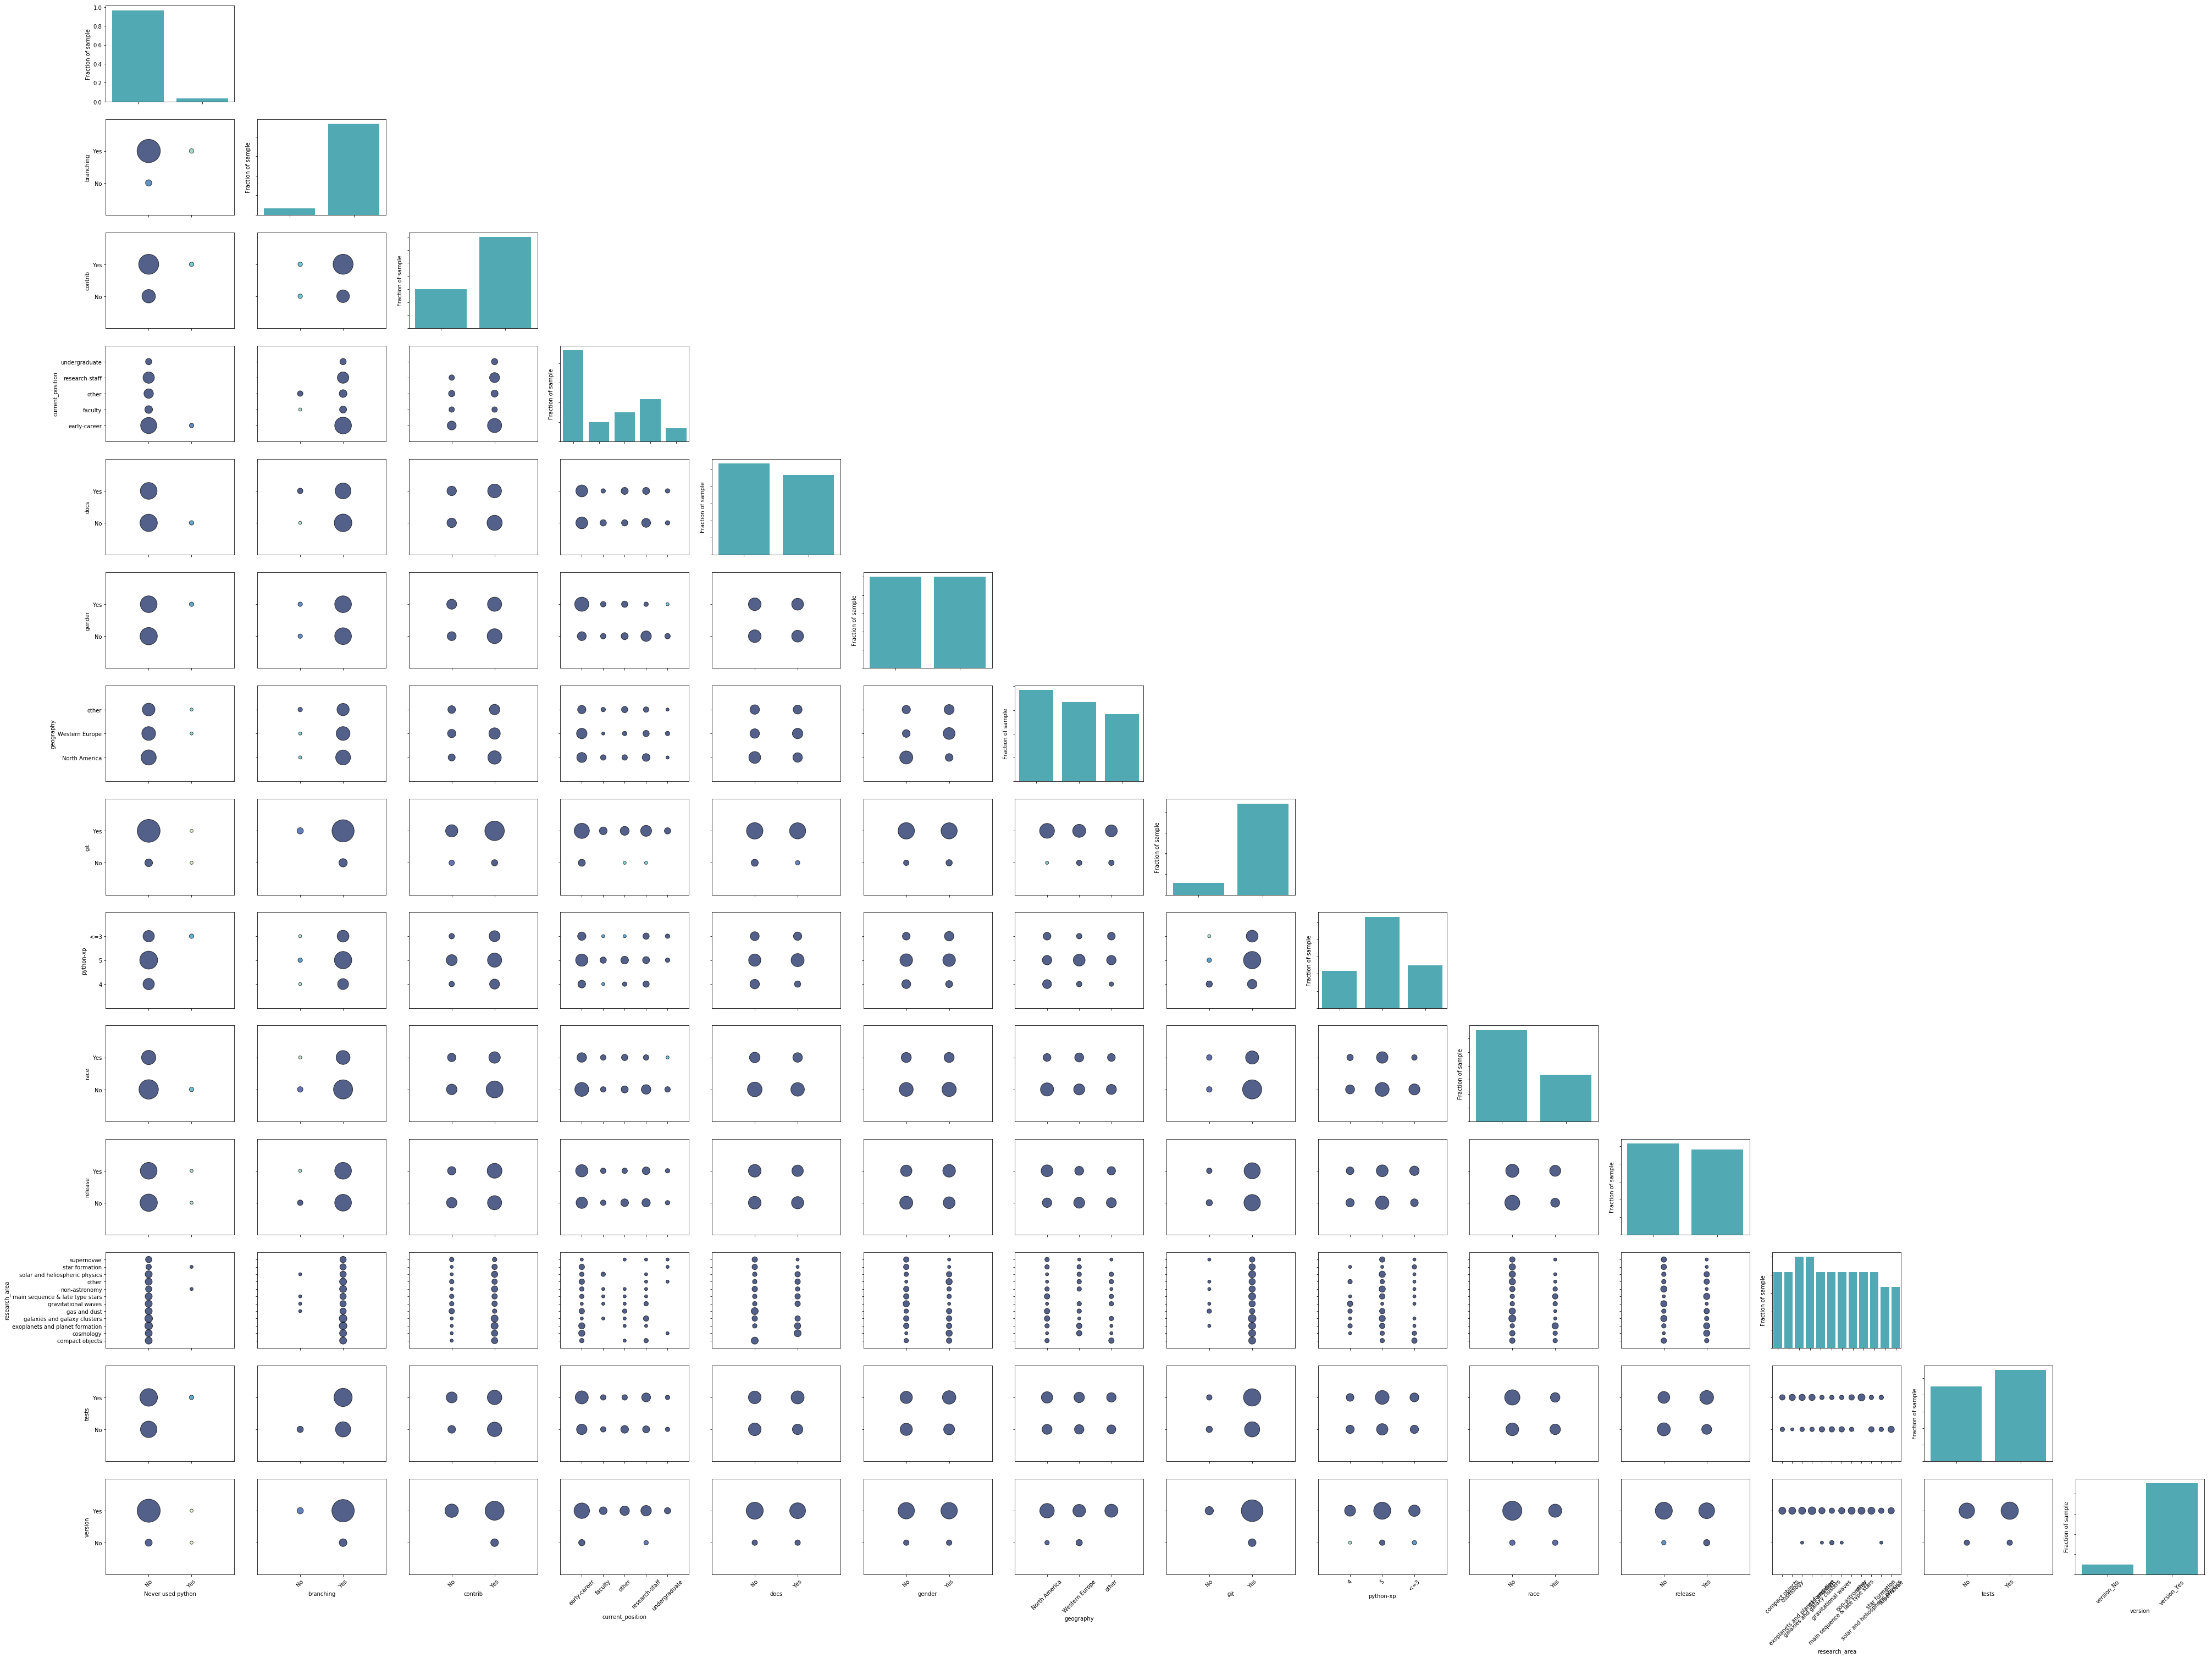

In [98]:
fig, ax  = entrofy.plotting.plot_triangle(df_out, weights,
                                          mappers=mappers,
                                          cat_type="violin")

We can also visualize the results as bar plots for each category. In the following, blue bars represent the fraction of candidates with that particular attributes. Green bars represent the fraction of participants in the output set with that attribute, and dashed black lines show the user-defined targets. This allows easy comparison between input/output sample as well as how closely the output set matches the targets.

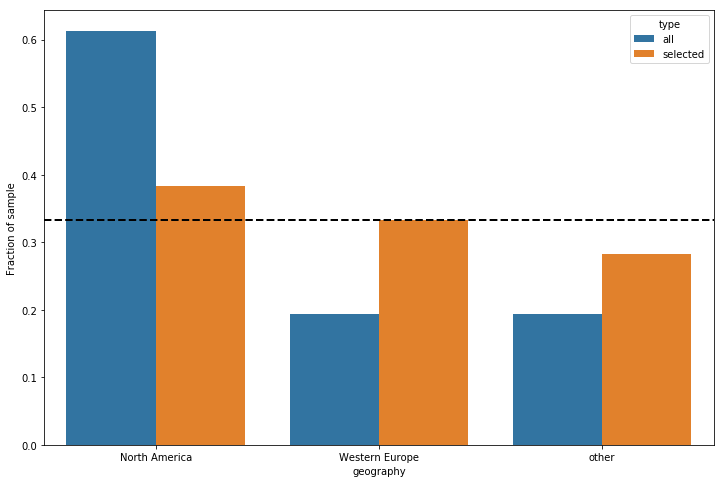

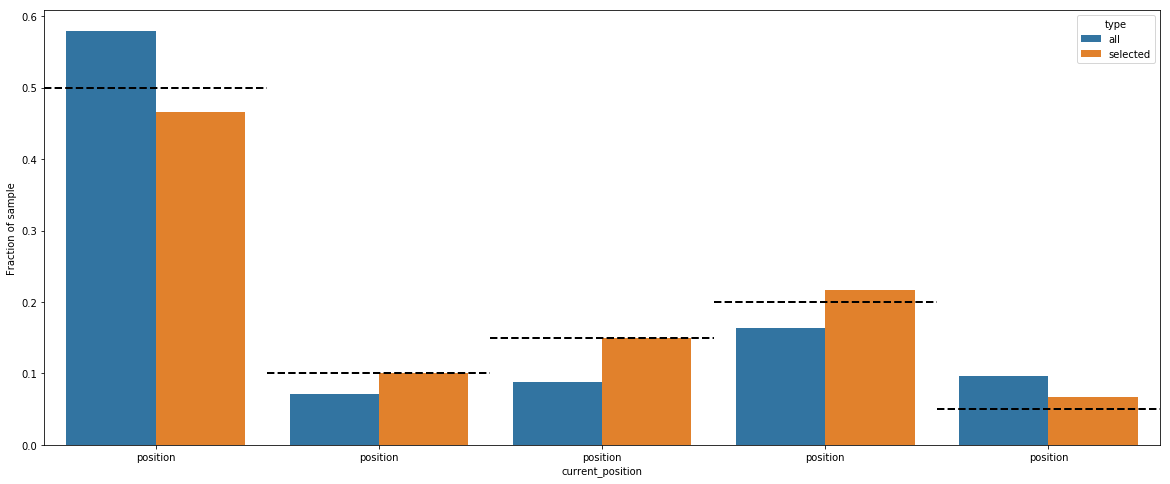

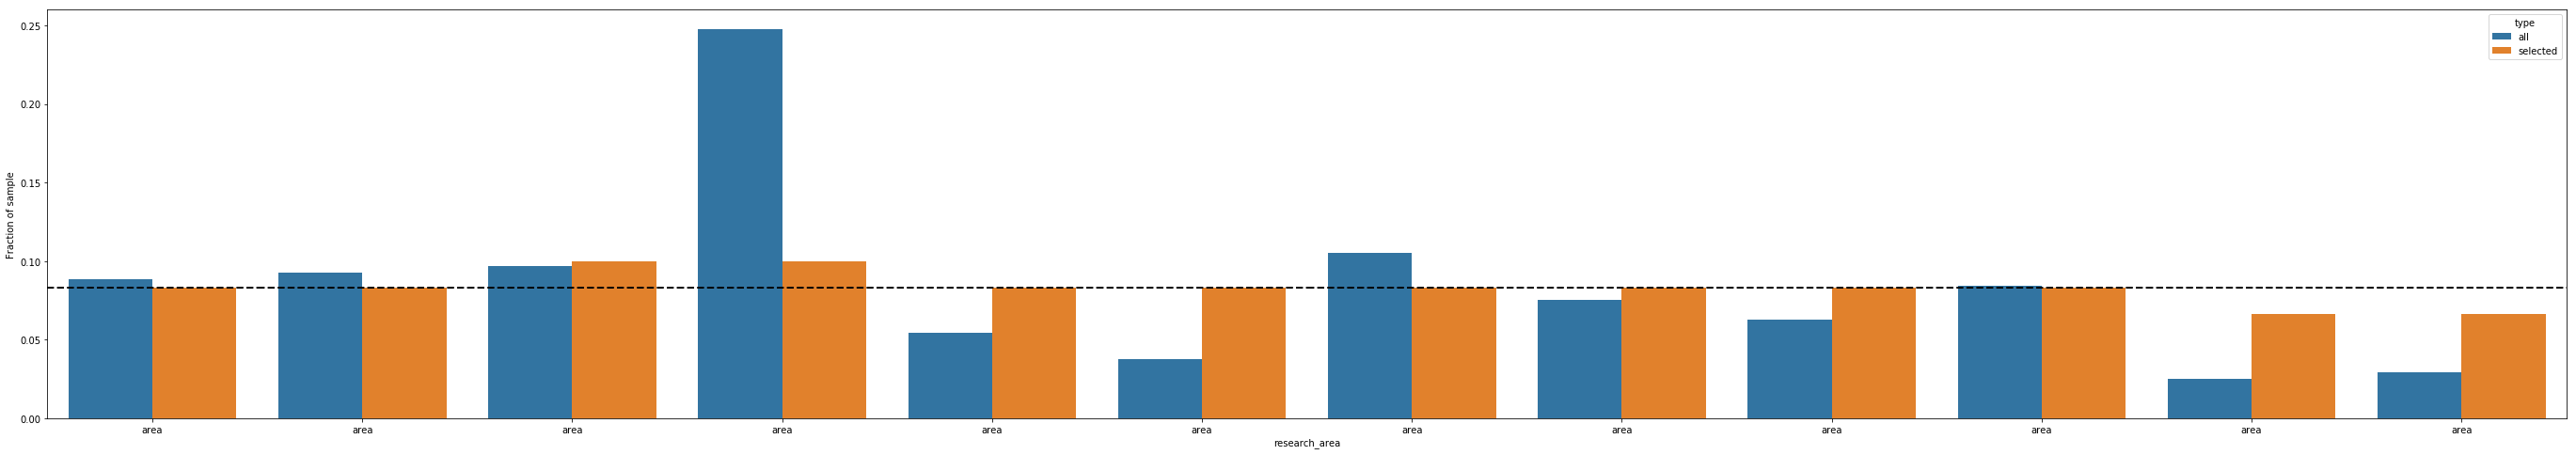

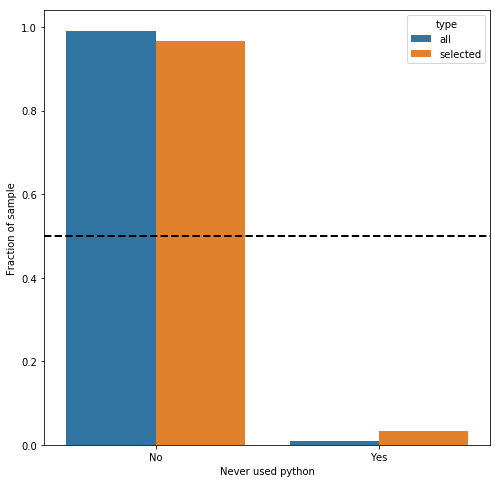

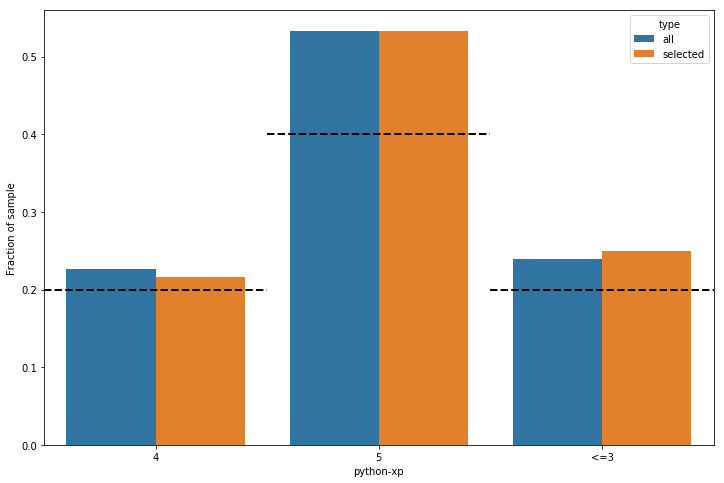

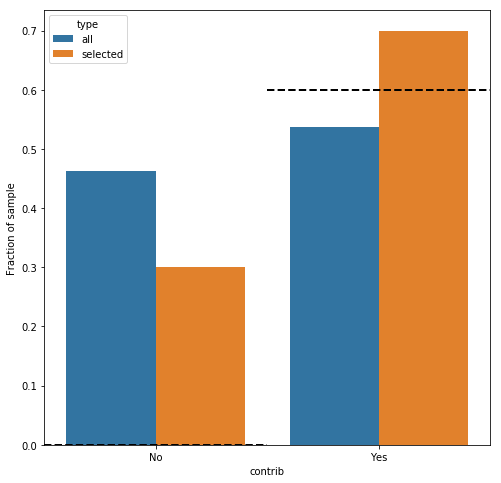

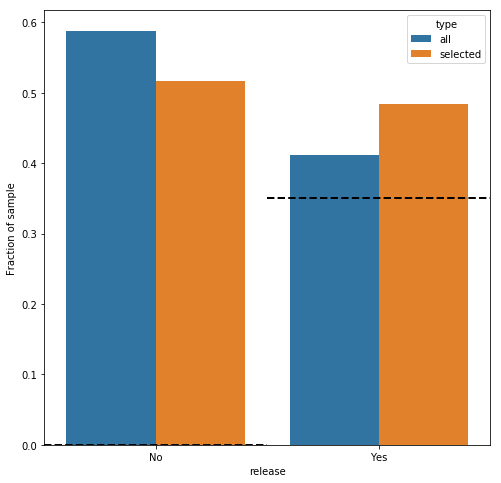

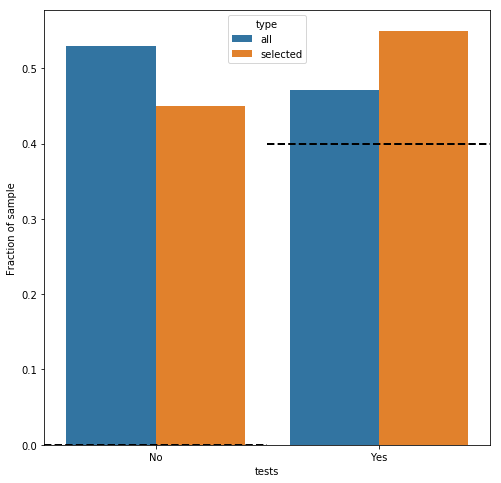

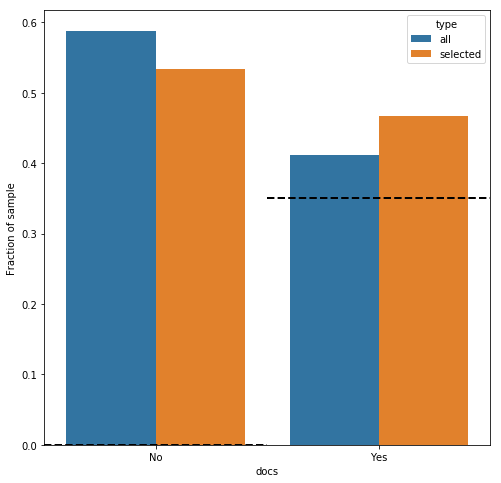

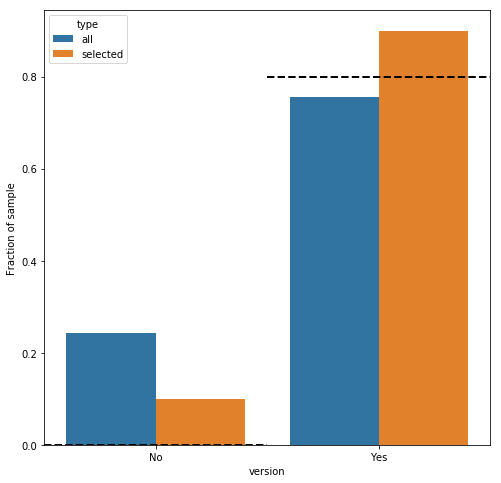

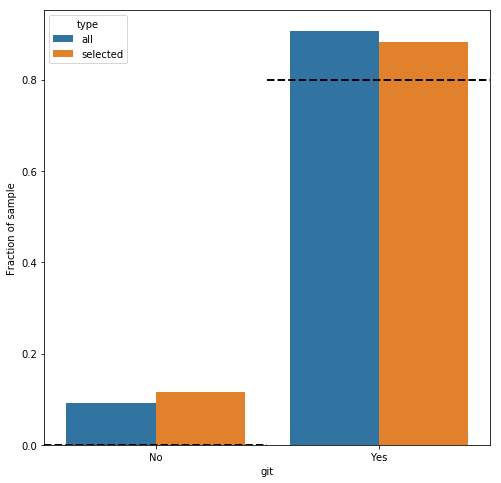

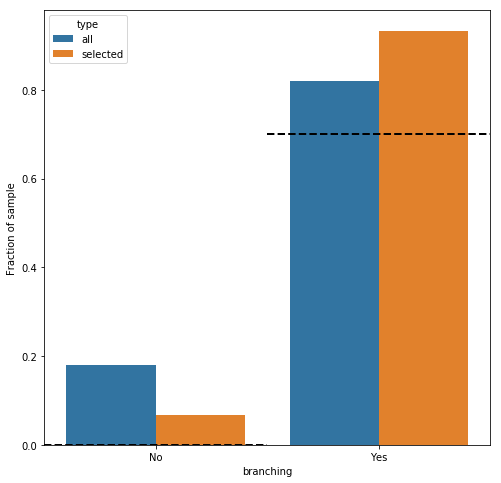

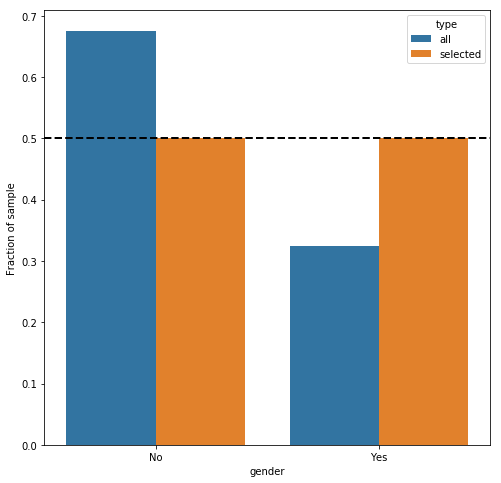

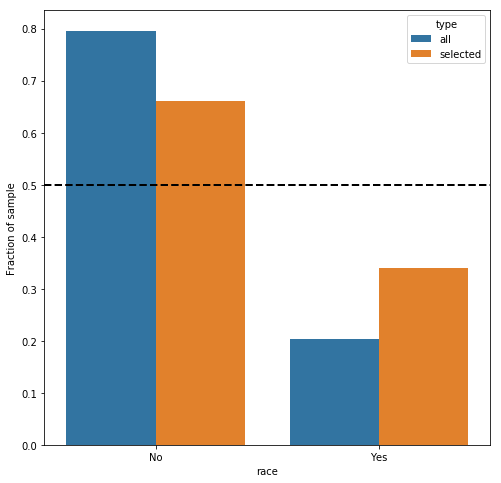

In [99]:
for c in data_ready.columns:
    _, _ = entrofy.plotting.plot_fractions(data_ready[c], idx,
                                       c, mappers[c])

These are, of course, not the exact numbers, since the data set used in this notebook only resembles the real sample in the aggregate.

What does our talk selection look like?

At this point, we finally un-blinded ourselves and printed out the names and e-mail addresses for the accepted sample set so that we could start sending out acceptance e-mails!

Aside from the organizers and a small number of pre-selected participants, the entire procedure was performed entirely without names and based only on the candidates' responses, abstracts and the complex optimization of the participant selection with respect to the goals of our workshop.  

In [100]:
accepted = data_ready.loc[idx]

In [101]:
accepted.to_csv("../data/accepted.csv", sep = "\t")

We also saved the remaining participants in a waitlist file.

In [102]:
waitlist = data_ready.loc[~data_ready.index.isin(idx)]

In [103]:
waitlist.to_csv("../data/waitlist.csv", sep="\t")

## After the selection

In the initial round, 11 candidates declined. We deicded to invite 25 additional people, assuming that many would decline. The  additional invites were selected in two slightly different ways. Ten selections were made by entrofy from a reduced list of pre-selects. The remaining 15 were selected from the full waitlist. 

In the following, we will pick randomly from the set of accepted participants as our declines, since this is a simulated data set. This was of course not the case for the real sample, where the IDs corresponded to actual participants.


In [105]:
declined_accepted = np.random.choice(accepted.index, replace=False, size=10)

In [106]:
declined_waitlist = np.random.choice(waitlist.index, replace=False, size=1)

Now we make a new data frame with the set of participants who accepted:

In [107]:
accepted_new = accepted.drop(declined_accepted)

We also drop these from our original data frame, since they no longer matter to our selection procedure:

In [108]:
data_ready_new = data_ready.drop(np.hstack([declined_accepted, declined_waitlist]))

In [109]:
len(data_ready_new)

227

In [110]:
idx_new, max_score_new = entrofy.core.entrofy(data_ready_new, 60, 
                                      pre_selects=accepted_new.index,
                                      mappers=mappers,
                                      weights=weights, seed=25)

In [111]:
accepted_secondrun = data_ready_new.loc[idx_new]

In [112]:
idx_fromwaitlist = accepted_secondrun.drop(accepted_new.index).index

In [113]:
idx_new

Int64Index([  3,  11,  12,  13,  15,  19,  25,  36,  45,  47,  49,  52,  54,
             58,  66,  76,  77,  80,  83,  88,  89,  94,  99, 102, 103, 104,
            107, 111, 113, 119, 124, 127, 130, 134, 138, 139, 141, 145, 164,
            177, 179, 181, 183, 186, 189, 193, 199, 210, 216, 217, 218, 219,
            220, 223, 225, 229, 230, 232, 236, 237],
           dtype='int64', name='ID')

At this point, we would print out the names of the newly selected participants and e-mail those as well.

In [114]:
from_waitlist_secondrun = data_ready_new.loc[idx_fromwaitlist]

Let's save the results of this run to file:

In [ ]:
from_waitlist_secondrun.to_csv("../data/secondrun_fromwaitlist.csv", sep="\t")

In [115]:
df_out_new = data_ready_new.loc[idx_new]

And we can plot the results of our selection again to see whether any categories notably changed: 

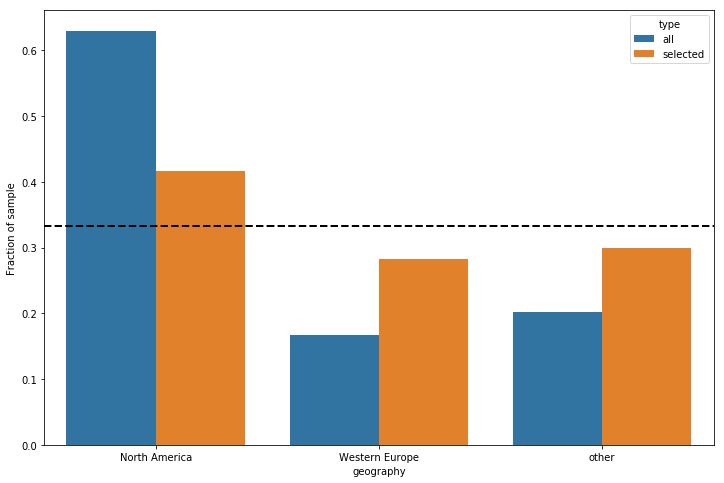

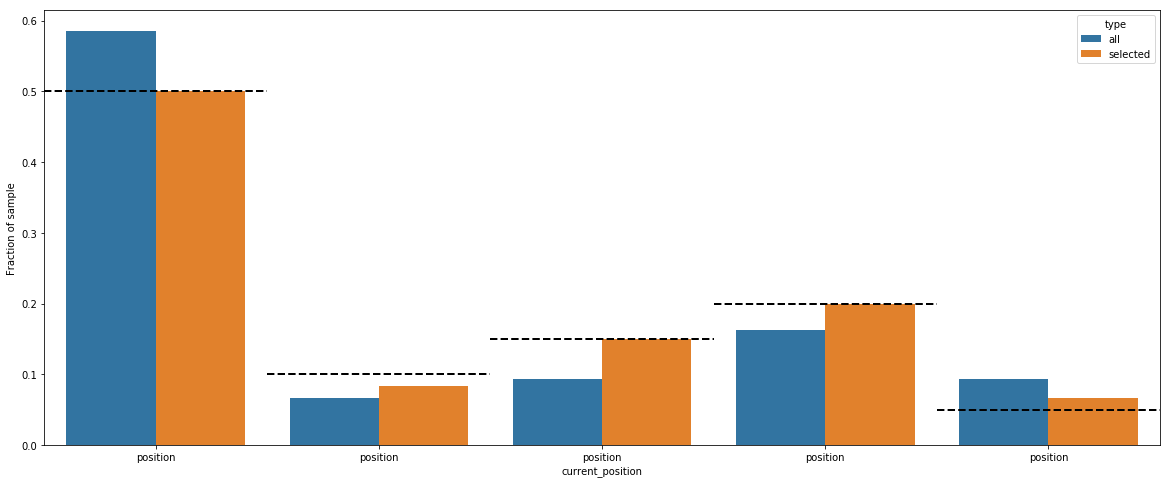

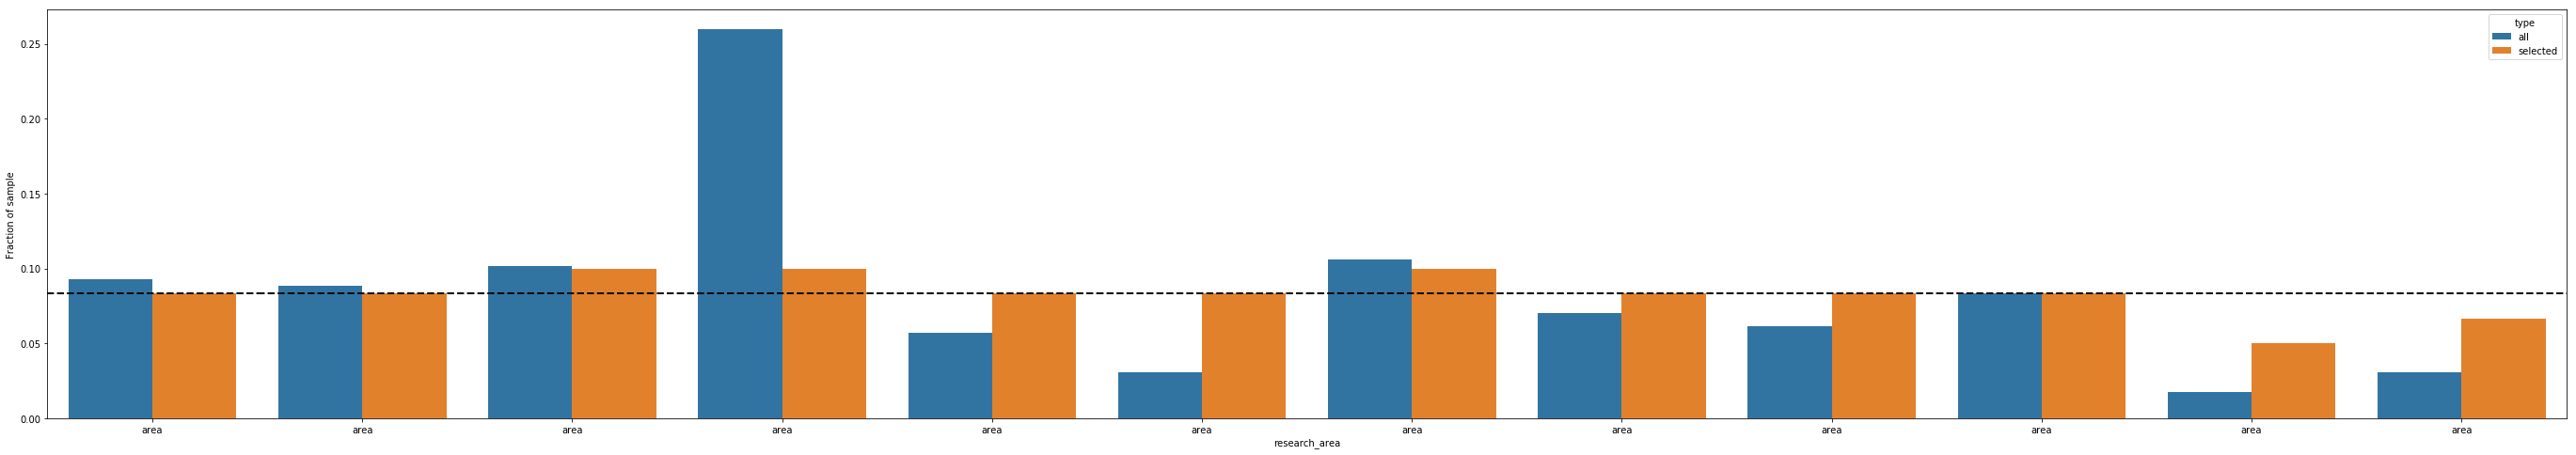

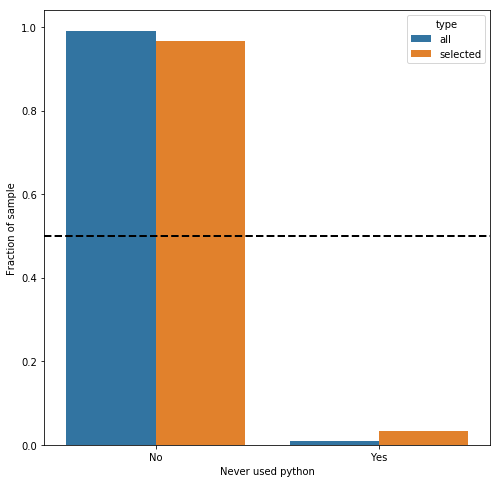

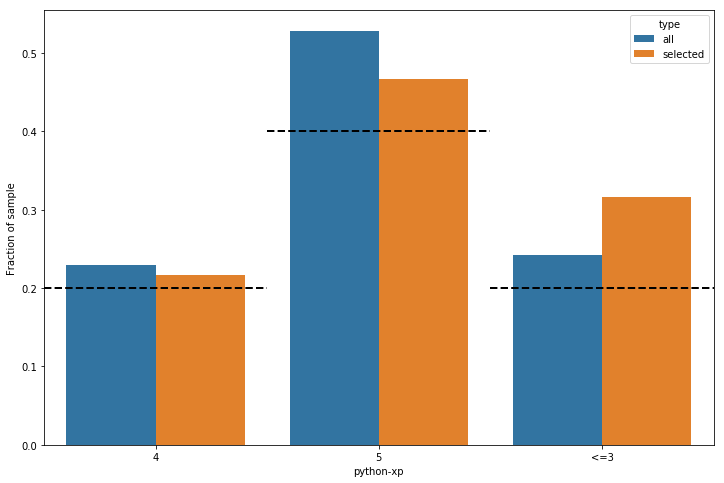

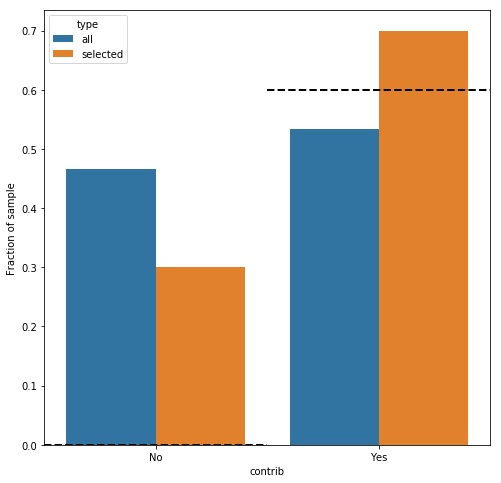

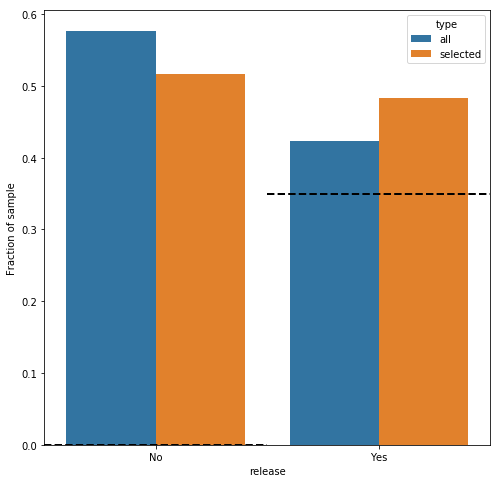

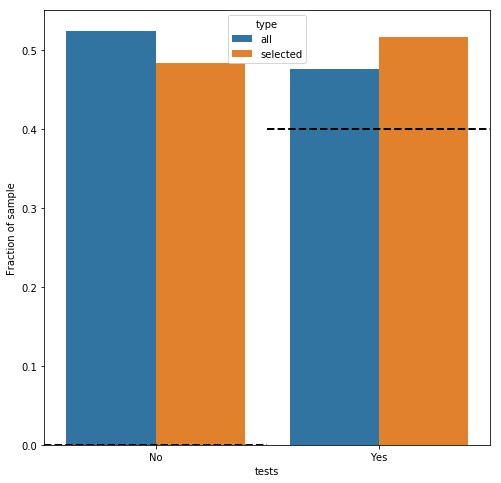

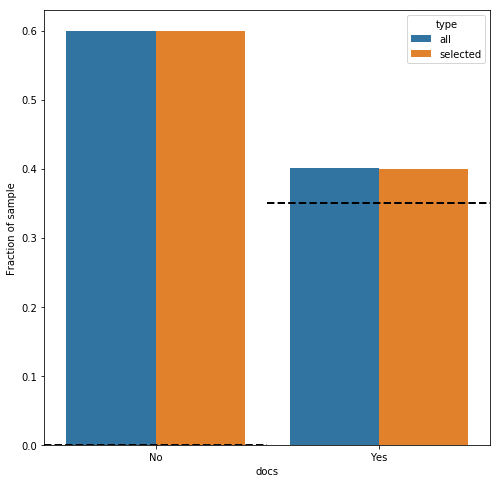

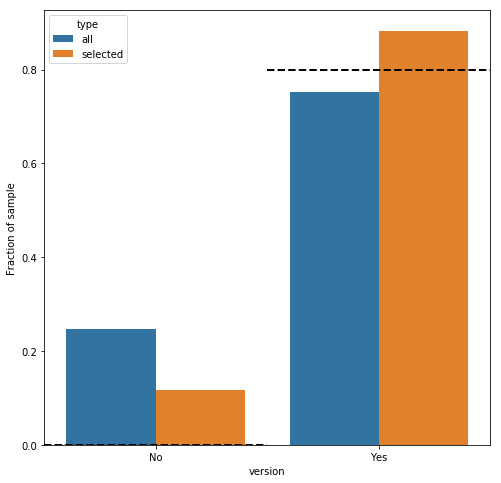

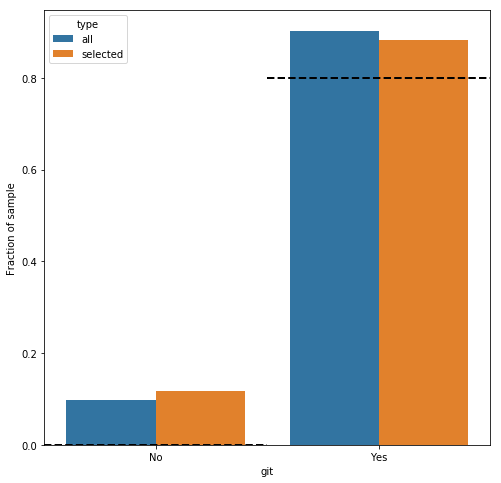

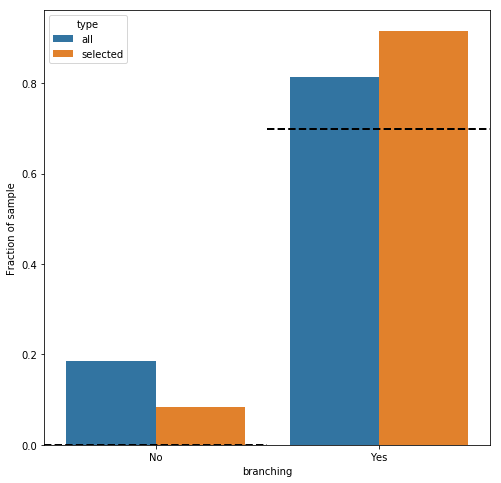

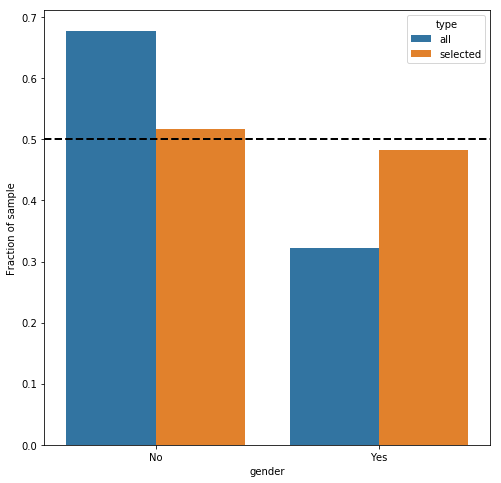

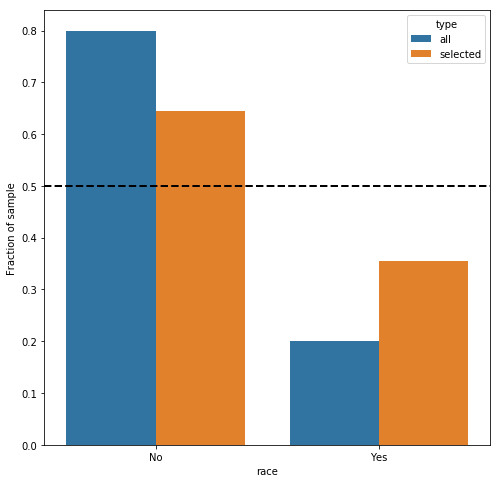

In [116]:
for c in mappers.keys():
    _, _ = entrofy.plotting.plot_fractions(data_ready_new[c], idx_new,
                                       c, mappers[c])

## Conclusion

We hope the above will provide useful to participants of PyAstro and beyond. We know that applying to a workshop can be frustrating: decision criteria are rarely clear, and acceptance/rejection e-mails rarely contain any information about how or why a decision was made. This notebook is an attempt to be transparent to our participants as well as those who did not get accepted this year, and as mentioned above, we welcome any and all feedback about the process as we attempt to learn from our experiences and improve for next year.

As a final note, we would like to point out that we saw diversity, particularly in demographic categories, decline as candidates declined and we selected replacements. As of now, we are not entirely sure what the reason for this is. 
One possible explanation could be that candidates from underrepresented minorities tended to decline at a larger rate than majority candidates did. If we also exhausted the candidate pool for a given category, the model can no longer fill the targets in that category, and our overall performance declines. 
Should this be the case, more intensive targeted recruiting among underrepresented minorities in the coming year could potentially provide a more diverse applicant pool, leading to a more diverse group of participants as well. 
We also wondered whether travel funding could be an issue, in particular for junior researchers. This can be addressed by making more efforts to secure sponsorship from relevant funding bodies and companies.
